In [4]:
import pandas as pd
import torch
import os
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import matplotlib.pyplot as plt

result_dir = "H:/JHMDB/models"

# all models

In [21]:
results = {}
for m in os.listdir(f"{result_dir}"):

    print(m)

    max_acc = 0

    for e in tqdm(os.listdir(f"{result_dir}/{m}")):

        res = torch.load(f"{result_dir}/{m}/{e}", map_location=torch.device('cpu'))
        acc = accuracy_score(res['val_actual'], res['val_predicted'])

        if acc > max_acc:
            max_acc = acc

    results[m] = max_acc

    print(max_acc)

sorted = {k: v for k, v in sorted(results.items(), key=lambda item: item[1])}
for k in sorted.keys():
    print(f"{k} - {sorted[k]}")

m_bigger_cube_1_width_conv_WIDER_v2


100%|██████████| 500/500 [07:48<00:00,  1.07it/s]


0.17537313432835822
m_v4


100%|██████████| 96/96 [15:20<00:00,  9.59s/it]


0.24253731343283583
m_v3.2


100%|██████████| 500/500 [13:28<00:00,  1.62s/it]


0.11194029850746269
m_v3.dropout


 99%|█████████▉| 97/98 [02:35<00:01,  1.61s/it]


RuntimeError: [enforce fail at ..\caffe2\serialize\inline_container.cc:144] . PytorchStreamReader failed reading zip archive: failed finding central directory

# one model

In [5]:
#Change this to the version you want
VERSION = "v4.3"

model_path = f"{result_dir}/m_{VERSION}"

training_accs = []
testing_accs = []

for e in tqdm(os.listdir(model_path)):

    res = torch.load(f"{model_path}/{e}", map_location=torch.device('cpu'))

    training_accs.append(accuracy_score(res['train_actual'], res['train_predicted']))
    testing_accs.append(accuracy_score(res['val_actual'], res['val_predicted']))

 19%|█▉        | 19/100 [04:04<17:24, 12.89s/it]


KeyboardInterrupt: 

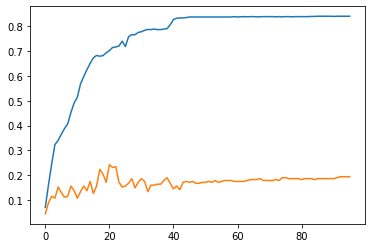

In [17]:
plt.plot(range(len(training_accs)), training_accs)
plt.plot(range(len(testing_accs)), testing_accs)

In [18]:
max(testing_accs)

0.24253731343283583